In [6]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# inicializujeme knižnicu seaborn
sns.set()

In [7]:
#nacitanie dat
data = pd.read_csv("datasets/learning_traces.13m.csv")
data

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.000000,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.500000,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.000000,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.500000,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.000000,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12854221,0.800000,1363104897,368,u:i5D8,en,it,d5efc552aaea3109eb5388aa1ec8673d,the/the<det><def><sp>,6,4,5,4
12854222,0.800000,1363104897,368,u:i5D8,en,it,a826c47947d68549fa81e19cafa57ba0,eat/eat<vblex><pres>,4,4,5,4
12854223,1.000000,1363104897,368,u:i5D8,en,it,5e29d77697d23070a1fb92eb6c90e9b6,bread/bread<n><sg>,4,4,4,4
12854224,0.600000,1363104897,368,u:i5D8,en,it,cdfecc9247566d40bb964a218c54c783,drink/drink<vblex><pres>,3,2,5,3


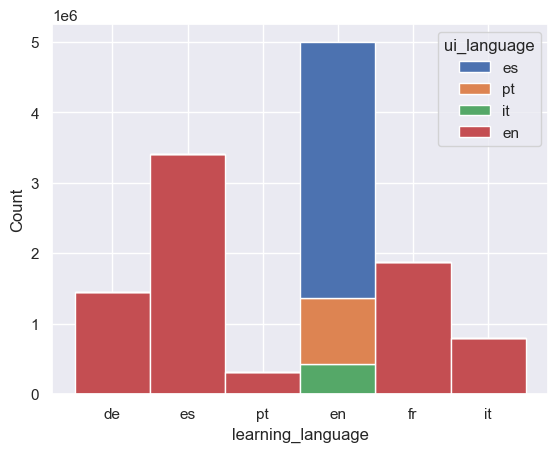

In [21]:
#zobrazenie Obrazka 15
custom_order = ['es', 'pt', 'it', 'en']
sns.histplot(data=data, x='learning_language', hue='ui_language', alpha=1, multiple='stack', hue_order=custom_order)
plt.show()

In [8]:
#ako dlho trval ezxperiment
from datetime import datetime

print(data["timestamp"].min())
print(data["timestamp"].max())
print("Hours:", (data["timestamp"].max() - data["timestamp"].min()) / (60 * 60))
print("Days:", (data["timestamp"].max() - data["timestamp"].min()) / (60 * 60 * 24))

print(datetime.utcfromtimestamp(data["timestamp"].min()).strftime('%Y-%m-%d %H:%M:%S'))

print(datetime.utcfromtimestamp(data["timestamp"].max()).strftime('%Y-%m-%d %H:%M:%S'))

1362076081
1363104897
Hours: 285.78222222222223
Days: 11.907592592592593
2013-02-28 18:28:01
2013-03-12 16:14:57


In [9]:
#pocet zucastnenych studentov
print((data["user_id"].unique()).size)

115222


In [10]:
#preskalovanie delty na hodiny
data["delta"] = (data["delta"] / (60 * 60))

In [12]:
#odstranenie zbytocnych atributov
del data["lexeme_id"]
del data["timestamp"]
del data["user_id"]
del data["session_correct"]
del data["session_seen"]
data

,p_recall,delta,learning_language,ui_language,lexeme_string,history_seen,history_correct
0,1.000000,7680.454167,de,en,lernt/lernen<vblex><pri><p3><sg>,6,4
1,0.500000,7680.454167,de,en,die/die<det><def><f><sg><nom>,4,4
2,1.000000,7680.454167,de,en,mann/mann<n><m><sg><nom>,5,4
3,0.500000,7680.454167,de,en,frau/frau<n><f><sg><nom>,6,5
4,1.000000,7680.454167,de,en,das/das<det><def><nt><sg><nom>,4,4
...,...,...,...,...,...,...,...
12854221,0.800000,0.102222,en,it,the/the<det><def><sp>,6,4
12854222,0.800000,0.102222,en,it,eat/eat<vblex><pres>,4,4
12854223,1.000000,0.102222,en,it,bread/bread<n><sg>,4,4
12854224,0.600000,0.102222,en,it,drink/drink<vblex><pres>,3,2


In [13]:
#vyextrahovanie atributu surface_form z atributu lexeme_string
import re


def regexer_surface_form(lexeme):
    surface_form = re.search("(.+?)/", str(lexeme)).group(1)

    return surface_form


data["surface_form"] = data["lexeme_string"].apply(regexer_surface_form)
data

,p_recall,delta,learning_language,ui_language,lexeme_string,history_seen,history_correct,surface_form
0,1.000000,7680.454167,de,en,lernt/lernen<vblex><pri><p3><sg>,6,4,lernt
1,0.500000,7680.454167,de,en,die/die<det><def><f><sg><nom>,4,4,die
2,1.000000,7680.454167,de,en,mann/mann<n><m><sg><nom>,5,4,mann
3,0.500000,7680.454167,de,en,frau/frau<n><f><sg><nom>,6,5,frau
4,1.000000,7680.454167,de,en,das/das<det><def><nt><sg><nom>,4,4,das
...,...,...,...,...,...,...,...,...
12854221,0.800000,0.102222,en,it,the/the<det><def><sp>,6,4,the
12854222,0.800000,0.102222,en,it,eat/eat<vblex><pres>,4,4,eat
12854223,1.000000,0.102222,en,it,bread/bread<n><sg>,4,4,bread
12854224,0.600000,0.102222,en,it,drink/drink<vblex><pres>,3,2,drink


In [14]:
#vyextrahovanie atributu root_form z atributu lexeme_string

def regexer_root_form(lexeme):
    root_form = re.search("/(.+?)<", str(lexeme)).group(1)

    return root_form


data["root_form"] = data["lexeme_string"].apply(regexer_root_form)
data

,p_recall,delta,learning_language,ui_language,lexeme_string,history_seen,history_correct,surface_form,root_form
0,1.000000,7680.454167,de,en,lernt/lernen<vblex><pri><p3><sg>,6,4,lernt,lernen
1,0.500000,7680.454167,de,en,die/die<det><def><f><sg><nom>,4,4,die,die
2,1.000000,7680.454167,de,en,mann/mann<n><m><sg><nom>,5,4,mann,mann
3,0.500000,7680.454167,de,en,frau/frau<n><f><sg><nom>,6,5,frau,frau
4,1.000000,7680.454167,de,en,das/das<det><def><nt><sg><nom>,4,4,das,das
...,...,...,...,...,...,...,...,...,...
12854221,0.800000,0.102222,en,it,the/the<det><def><sp>,6,4,the,the
12854222,0.800000,0.102222,en,it,eat/eat<vblex><pres>,4,4,eat,eat
12854223,1.000000,0.102222,en,it,bread/bread<n><sg>,4,4,bread,bread
12854224,0.600000,0.102222,en,it,drink/drink<vblex><pres>,3,2,drink,drink


In [15]:
#zmazanie chybnych hodnot
data.drop(data[data["root_form"] == "'"].index, inplace=True)
data.drop(data[data["root_form"] == "'s"].index, inplace=True)
data

,p_recall,delta,learning_language,ui_language,lexeme_string,history_seen,history_correct,surface_form,root_form
0,1.000000,7680.454167,de,en,lernt/lernen<vblex><pri><p3><sg>,6,4,lernt,lernen
1,0.500000,7680.454167,de,en,die/die<det><def><f><sg><nom>,4,4,die,die
2,1.000000,7680.454167,de,en,mann/mann<n><m><sg><nom>,5,4,mann,mann
3,0.500000,7680.454167,de,en,frau/frau<n><f><sg><nom>,6,5,frau,frau
4,1.000000,7680.454167,de,en,das/das<det><def><nt><sg><nom>,4,4,das,das
...,...,...,...,...,...,...,...,...,...
12854221,0.800000,0.102222,en,it,the/the<det><def><sp>,6,4,the,the
12854222,0.800000,0.102222,en,it,eat/eat<vblex><pres>,4,4,eat,eat
12854223,1.000000,0.102222,en,it,bread/bread<n><sg>,4,4,bread,bread
12854224,0.600000,0.102222,en,it,drink/drink<vblex><pres>,3,2,drink,drink


In [16]:
#nahradenie hodnot "<*sf>" v atribute surface_form hodnotou z atributu root_form
data['surface_form'] = np.where(data['surface_form'] == "<*sf>", data['root_form'], data['surface_form'])
data

,p_recall,delta,learning_language,ui_language,lexeme_string,history_seen,history_correct,surface_form,root_form
0,1.000000,7680.454167,de,en,lernt/lernen<vblex><pri><p3><sg>,6,4,lernt,lernen
1,0.500000,7680.454167,de,en,die/die<det><def><f><sg><nom>,4,4,die,die
2,1.000000,7680.454167,de,en,mann/mann<n><m><sg><nom>,5,4,mann,mann
3,0.500000,7680.454167,de,en,frau/frau<n><f><sg><nom>,6,5,frau,frau
4,1.000000,7680.454167,de,en,das/das<det><def><nt><sg><nom>,4,4,das,das
...,...,...,...,...,...,...,...,...,...
12854221,0.800000,0.102222,en,it,the/the<det><def><sp>,6,4,the,the
12854222,0.800000,0.102222,en,it,eat/eat<vblex><pres>,4,4,eat,eat
12854223,1.000000,0.102222,en,it,bread/bread<n><sg>,4,4,bread,bread
12854224,0.600000,0.102222,en,it,drink/drink<vblex><pres>,3,2,drink,drink


In [17]:
#vyextrahovanie lexemovych vlastnosti z atributu lexeme_string

def regex_modifiers(lexeme):
    modifiers_split = re.findall(r'\<.*?\>', lexeme)
    modifiers_string = ""

    for modifier in modifiers_split:
        modifiers_string = modifiers_string + modifier
    return modifiers_string


data["modifiers_split"] = data["lexeme_string"].apply(regex_modifiers)
data

,p_recall,delta,learning_language,ui_language,lexeme_string,history_seen,history_correct,surface_form,root_form,modifiers_split
0,1.000000,7680.454167,de,en,lernt/lernen<vblex><pri><p3><sg>,6,4,lernt,lernen,<vblex><pri><p3><sg>
1,0.500000,7680.454167,de,en,die/die<det><def><f><sg><nom>,4,4,die,die,<det><def><f><sg><nom>
2,1.000000,7680.454167,de,en,mann/mann<n><m><sg><nom>,5,4,mann,mann,<n><m><sg><nom>
3,0.500000,7680.454167,de,en,frau/frau<n><f><sg><nom>,6,5,frau,frau,<n><f><sg><nom>
4,1.000000,7680.454167,de,en,das/das<det><def><nt><sg><nom>,4,4,das,das,<det><def><nt><sg><nom>
...,...,...,...,...,...,...,...,...,...,...
12854221,0.800000,0.102222,en,it,the/the<det><def><sp>,6,4,the,the,<det><def><sp>
12854222,0.800000,0.102222,en,it,eat/eat<vblex><pres>,4,4,eat,eat,<vblex><pres>
12854223,1.000000,0.102222,en,it,bread/bread<n><sg>,4,4,bread,bread,<n><sg>
12854224,0.600000,0.102222,en,it,drink/drink<vblex><pres>,3,2,drink,drink,<vblex><pres>


In [18]:
#Zmazeme lexeme_string pretoze ho uz nepotrebujeme
del data["lexeme_string"]
data

,p_recall,delta,learning_language,ui_language,history_seen,history_correct,surface_form,root_form,modifiers_split
0,1.000000,7680.454167,de,en,6,4,lernt,lernen,<vblex><pri><p3><sg>
1,0.500000,7680.454167,de,en,4,4,die,die,<det><def><f><sg><nom>
2,1.000000,7680.454167,de,en,5,4,mann,mann,<n><m><sg><nom>
3,0.500000,7680.454167,de,en,6,5,frau,frau,<n><f><sg><nom>
4,1.000000,7680.454167,de,en,4,4,das,das,<det><def><nt><sg><nom>
...,...,...,...,...,...,...,...,...,...
12854221,0.800000,0.102222,en,it,6,4,the,the,<det><def><sp>
12854222,0.800000,0.102222,en,it,4,4,eat,eat,<vblex><pres>
12854223,1.000000,0.102222,en,it,4,4,bread,bread,<n><sg>
12854224,0.600000,0.102222,en,it,3,2,drink,drink,<vblex><pres>


In [19]:
#odvodenie atributov history_incorrect, word_length, differs_from_root, passed
data["history_incorrect"] = data["history_seen"] - data["history_correct"]
data["word_length"] = data["surface_form"].apply(len)
data["differs_from_root"] = ((data["surface_form"] != data["root_form"]).astype(int))
data["passed"] = data["p_recall"].apply(lambda x: 1 if x == 1 else 0)
data

,p_recall,delta,learning_language,ui_language,history_seen,history_correct,surface_form,root_form,modifiers_split,history_incorrect,word_length,differs_from_root,passed
0,1.000000,7680.454167,de,en,6,4,lernt,lernen,<vblex><pri><p3><sg>,2,5,1,1
1,0.500000,7680.454167,de,en,4,4,die,die,<det><def><f><sg><nom>,0,3,0,0
2,1.000000,7680.454167,de,en,5,4,mann,mann,<n><m><sg><nom>,1,4,0,1
3,0.500000,7680.454167,de,en,6,5,frau,frau,<n><f><sg><nom>,1,4,0,0
4,1.000000,7680.454167,de,en,4,4,das,das,<det><def><nt><sg><nom>,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854221,0.800000,0.102222,en,it,6,4,the,the,<det><def><sp>,2,3,0,0
12854222,0.800000,0.102222,en,it,4,4,eat,eat,<vblex><pres>,0,3,0,0
12854223,1.000000,0.102222,en,it,4,4,bread,bread,<n><sg>,0,5,0,1
12854224,0.600000,0.102222,en,it,3,2,drink,drink,<vblex><pres>,1,5,0,0


In [20]:
#odvodenie vsetkych ostatnych lexemovych binarnych atributov
#prn = pronoun/zameno
#v... = verb/sloveso
#pr = preposition/predlozka
#n = noun/podstatne meno
#adj = adjective/pridavne meno
#cnj.. = conjunction/spojka
#det = determiner
#adv = adverb/prislovka
#ij = interjenction/citoslovcia(pozdrav)
#=====================
#sg = singular
#pl = plural
def regexer_verb(lexeme):
    if re.search("<v(.+?)>", str(lexeme)):
        return 1
    else:
        return 0


def regexer_noun(lexeme):
    if re.search("<n>", str(lexeme)):
        return 1
    elif re.search("<np>", str(lexeme)):
        return 1
    else:
        return 0


def regexer_prepostion(lexeme):
    if re.search("<pr>", str(lexeme)):
        return 1
    if re.search("<pprep>", str(lexeme)):
        return 1
    else:
        return 0


def regexer_pronoun(lexeme):
    if re.search("<prn>", str(lexeme)):
        return 1
    else:
        return 0


def regexer_adjective(lexeme):
    if re.search("<adj>", str(lexeme)):
        return 1
    elif re.search("<rel>", str(lexeme)):
        return 1
    else:
        return 0


def regexer_adverb(lexeme):
    if re.search("<adv>", str(lexeme)):
        return 1
    elif re.search("<preadv>", str(lexeme)):
        return 1
    else:
        return 0


def regexer_conjunction(lexeme):
    if re.search("<cnj(.+?)>", str(lexeme)):
        return 1
    else:
        return 0


def regexer_determiner(lexeme):
    if re.search("<det>", str(lexeme)):
        return 1
    elif re.search("<predet>", str(lexeme)):
        return 1
    else:
        return 0


def regexer_interjection(lexeme):
    if re.search("<ij>", str(lexeme)):
        return 1
    else:
        return 0


def regexer_plural(lexeme):
    if re.search("<pl>", str(lexeme)):
        return 1
    else:
        return 0


def regexer_number(lexeme):
    if re.search("<num>", str(lexeme)):
        return 1
    if re.search("<ord>", str(lexeme)):
        return 1
    else:
        return 0


def regexer_phrase(lexeme):
    if re.search("<@(.+?)>", str(lexeme)):
        return 1
    else:
        return 0


data["verb"] = data["modifiers_split"].apply(regexer_verb)
data["noun"] = data["modifiers_split"].apply(regexer_noun)
data["preposition"] = data["modifiers_split"].apply(regexer_prepostion)
data["pronoun"] = data["modifiers_split"].apply(regexer_pronoun)
data["adjective"] = data["modifiers_split"].apply(regexer_adjective)
data["determiner"] = data["modifiers_split"].apply(regexer_determiner)
data["adverb"] = data["modifiers_split"].apply(regexer_adverb)
data["conjunction"] = data["modifiers_split"].apply(regexer_conjunction)
data["interjection"] = data["modifiers_split"].apply(regexer_interjection)
data["plural"] = data["modifiers_split"].apply(regexer_plural)
data["number"] = data["modifiers_split"].apply(regexer_number)
data["phrase"] = data["modifiers_split"].apply(regexer_phrase)
data

,p_recall,delta,learning_language,ui_language,history_seen,history_correct,surface_form,root_form,modifiers_split,history_incorrect,...,preposition,pronoun,adjective,determiner,adverb,conjunction,interjection,plural,number,phrase
0,1.000000,7680.454167,de,en,6,4,lernt,lernen,<vblex><pri><p3><sg>,2,...,0,0,0,0,0,0,0,0,0,0
1,0.500000,7680.454167,de,en,4,4,die,die,<det><def><f><sg><nom>,0,...,0,0,0,1,0,0,0,0,0,0
2,1.000000,7680.454167,de,en,5,4,mann,mann,<n><m><sg><nom>,1,...,0,0,0,0,0,0,0,0,0,0
3,0.500000,7680.454167,de,en,6,5,frau,frau,<n><f><sg><nom>,1,...,0,0,0,0,0,0,0,0,0,0
4,1.000000,7680.454167,de,en,4,4,das,das,<det><def><nt><sg><nom>,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854221,0.800000,0.102222,en,it,6,4,the,the,<det><def><sp>,2,...,0,0,0,1,0,0,0,0,0,0
12854222,0.800000,0.102222,en,it,4,4,eat,eat,<vblex><pres>,0,...,0,0,0,0,0,0,0,0,0,0
12854223,1.000000,0.102222,en,it,4,4,bread,bread,<n><sg>,0,...,0,0,0,0,0,0,0,0,0,0
12854224,0.600000,0.102222,en,it,3,2,drink,drink,<vblex><pres>,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#ulozenie kompletneho suboru dat so vsetkymy jazykmi do csv suboru
data.to_csv("datasets/data_ready.csv", index=False)

In [ ]:
#vytvorenie samostatnych datasetov podla jazyka ktory sa studenti ucili
data_de = data[data["learning_language"] == "de"]
data_en = data[data["learning_language"] == "en"]
data_es = data[data["learning_language"] == "es"]
data_fr = data[data["learning_language"] == "fr"]
data_it = data[data["learning_language"] == "it"]
data_pt = data[data["learning_language"] == "pt"]
del data_de["learning_language"]
del data_en["learning_language"]
del data_es["learning_language"]
del data_fr["learning_language"]
del data_it["learning_language"]
del data_pt["learning_language"]
data_en

In [ ]:
#pip3 install wordfreq - nainstalovat kniznicu pomocou tohto prikazu
#aplikovanie kniznice wordfreq pre ziskanie atributu frekventovanosti slov v anglictine
from wordfreq import word_frequency

data_en["word_freq"] = data_en["surface_form"].apply(lambda x: word_frequency(x, "en", wordlist="best", minimum=0.0))
data_en

In [ ]:
#ulozenie anglickeho datasetu do csv suboru
data_en.to_csv("datasets/data_ready_en.csv", index=False)

In [22]:
#nacitanie csv suboru anglickych dat po predspracovani
data_en = pd.read_csv("datasets/data_ready_en.csv")

data_en

,p_recall,delta,ui_language,history_seen,history_correct,session_seen,surface_form,root_form,modifiers_split,history_incorrect,...,pronoun,adjective,adverb,conjunction,determiner,interjection,plural,number,phrase,word_freq
0,1.000000,0.099167,pt,17,17,2,definition,definition,<n><sg>,0,...,0,0,0,0,0,0,0,0,0,0.000038
1,1.000000,0.099167,pt,19,19,3,surface,surface,<n><sg>,0,...,0,0,0,0,0,0,0,0,0,0.000068
2,1.000000,0.099167,pt,21,20,3,scale,scale,<n><sg>,1,...,0,0,0,0,0,0,0,0,0,0.000068
3,0.800000,0.099167,pt,44,36,5,temperature,temperature,<n><sg>,8,...,0,0,0,0,0,0,0,0,0,0.000044
4,1.000000,0.099167,pt,21,20,3,distance,distance,<n><sg>,1,...,0,0,0,0,0,0,0,0,0,0.000071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997494,0.800000,0.102222,it,6,4,5,the,the,<det><def><sp>,2,...,0,0,0,0,1,0,0,0,0,0.053700
4997495,0.800000,0.102222,it,4,4,5,eat,eat,<vblex><pres>,0,...,0,0,0,0,0,0,0,0,0,0.000135
4997496,1.000000,0.102222,it,4,4,4,bread,bread,<n><sg>,0,...,0,0,0,0,0,0,0,0,0,0.000032
4997497,0.600000,0.102222,it,3,2,5,drink,drink,<vblex><pres>,1,...,0,0,0,0,0,0,0,0,0,0.000079


In [23]:
#aplikovanie one-hot-encodingu na atribut ui_language
data_en = pd.get_dummies(data_en, columns=["ui_language"])
data_en

,p_recall,delta,history_seen,history_correct,session_seen,surface_form,root_form,modifiers_split,history_incorrect,word_length,...,conjunction,determiner,interjection,plural,number,phrase,word_freq,ui_language_es,ui_language_it,ui_language_pt
0,1.000000,0.099167,17,17,2,definition,definition,<n><sg>,0,10,...,0,0,0,0,0,0,0.000038,0,0,1
1,1.000000,0.099167,19,19,3,surface,surface,<n><sg>,0,7,...,0,0,0,0,0,0,0.000068,0,0,1
2,1.000000,0.099167,21,20,3,scale,scale,<n><sg>,1,5,...,0,0,0,0,0,0,0.000068,0,0,1
3,0.800000,0.099167,44,36,5,temperature,temperature,<n><sg>,8,11,...,0,0,0,0,0,0,0.000044,0,0,1
4,1.000000,0.099167,21,20,3,distance,distance,<n><sg>,1,8,...,0,0,0,0,0,0,0.000071,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997494,0.800000,0.102222,6,4,5,the,the,<det><def><sp>,2,3,...,0,1,0,0,0,0,0.053700,0,1,0
4997495,0.800000,0.102222,4,4,5,eat,eat,<vblex><pres>,0,3,...,0,0,0,0,0,0,0.000135,0,1,0
4997496,1.000000,0.102222,4,4,4,bread,bread,<n><sg>,0,5,...,0,0,0,0,0,0,0.000032,0,1,0
4997497,0.600000,0.102222,3,2,5,drink,drink,<vblex><pres>,1,5,...,0,0,0,0,0,0,0.000079,0,1,0


In [24]:
#zmazeme atributy ktore nam ostali po extrahovani
del data_en["modifiers_split"]
del data_en["surface_form"]
del data_en["root_form"]
data_en

,p_recall,delta,history_seen,history_correct,session_seen,history_incorrect,word_length,differs_from_root,passed,verb,...,conjunction,determiner,interjection,plural,number,phrase,word_freq,ui_language_es,ui_language_it,ui_language_pt
0,1.000000,0.099167,17,17,2,0,10,0,1,0,...,0,0,0,0,0,0,0.000038,0,0,1
1,1.000000,0.099167,19,19,3,0,7,0,1,0,...,0,0,0,0,0,0,0.000068,0,0,1
2,1.000000,0.099167,21,20,3,1,5,0,1,0,...,0,0,0,0,0,0,0.000068,0,0,1
3,0.800000,0.099167,44,36,5,8,11,0,0,0,...,0,0,0,0,0,0,0.000044,0,0,1
4,1.000000,0.099167,21,20,3,1,8,0,1,0,...,0,0,0,0,0,0,0.000071,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997494,0.800000,0.102222,6,4,5,2,3,0,0,0,...,0,1,0,0,0,0,0.053700,0,1,0
4997495,0.800000,0.102222,4,4,5,0,3,0,0,1,...,0,0,0,0,0,0,0.000135,0,1,0
4997496,1.000000,0.102222,4,4,4,0,5,0,1,0,...,0,0,0,0,0,0,0.000032,0,1,0
4997497,0.600000,0.102222,3,2,5,1,5,0,0,1,...,0,0,0,0,0,0,0.000079,0,1,0


In [ ]:
#zmazeme session_seen
del data_en["session_seen"]
data_en

In [ ]:
#rozdelime si data na trenovaciu a testovaciu mnozinu
from sklearn.model_selection import train_test_split

data_en_train, data_en_test = train_test_split(data_en, test_size=0.2, random_state=42, stratify=data_en["passed"])

In [ ]:
#zobrazenie rozdelenia
print(len(data_en))
print(len(data_en_train))
print(len(data_en_test))

print(pd.value_counts(data_en_train["passed"]))
print(pd.value_counts(data_en_test["passed"]))

In [ ]:
#ulozime si trenovaciu a testovaciu mnozinu do samostatnych datasetov
data_en_train.to_csv("datasets/data_ready_en_train.csv", index=False)
data_en_test.to_csv("datasets/data_ready_en_test.csv", index=False)

In [ ]:
#aplikovanie SMOTE oversamplingu na trenovaciu mnozinu a jej nasledne ulozenie do samostatneho datasetu
from imblearn.over_sampling import SMOTE

X = data_en_train.drop(['passed'], axis=1)
y = data_en_train['passed']
X

oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X, y)

print(len(X_train_smote))
print(len(y_train_smote))
print(pd.value_counts(y_train_smote))

X_train_smote["passed"] = y_train_smote
X_train_smote
data_en_train_oversampled = X_train_smote
data_en_train_oversampled.to_csv("datasets/data_ready_en_train_oversampled.csv", index=False)

In [ ]:
#aplikovanie  Nahodneho undersamplingu na trenovaciu mnozinu a jej nasledne ulozenie do samostatneho datasetu
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print(len(X_under))
print(len(y_under))
print(pd.value_counts(y_under))
X_under["passed"] = y_under
data_en_train_undersampled = X_under
data_en_train_undersampled
data_en_train_undersampled.to_csv("datasets/data_ready_en_train_undersampled.csv", index=False)

In [ ]:
#MODELOVANIE

In [ ]:
#modelovanie modelu Nahodneho lesa

In [25]:
#importovanie kniznice Nahodneho lesa a dalsich potrebnych kniznic
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


In [ ]:
#nacitanie testovacej mnoziny
X_test = data_en_test.drop(['passed', 'p_recall'], axis=1)
y_test = data_en_test['passed']
X_test

In [ ]:
###########################################
#Neladeny model bez pouzitia prevzorkovania
###########################################

In [ ]:
data_en_train = pd.read_csv("datasets/data_ready_en_train.csv")
data_en_train

In [ ]:
X_notover = data_en_train.drop('passed', axis=1)
y_notover = data_en_train['passed']
X_notover

In [ ]:
print(pd.value_counts(y_notover))

In [ ]:
clf_default_notover = RandomForestClassifier(n_estimators=64)
clf_default_notover.fit(X_notover, y_notover)

In [ ]:
#vypisanie metrik
y_pred = clf_default_notover.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
roc_auc_score(y_test, clf_default_notover.predict_proba(X_test)[:, 1])

In [ ]:
#############################################
#Neladeny model s pouzitim SMOTE nadvzorkovania
#############################################

In [ ]:
data_en_train_oversampled = pd.read_csv("datasets/data_ready_en_train_oversampled.csv")
X = data_en_train_oversampled.drop('passed', axis=1)
y = data_en_train_oversampled['passed']
X

In [ ]:
clf_default = RandomForestClassifier(n_estimators=64)

In [ ]:
clf_default.fit(X, y)

In [ ]:
#vypisanie metrik
y_pred = clf_default.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
roc_auc_score(y_test, clf_default.predict_proba(X_test)[:, 1])

In [ ]:
#############################################
#Neladeny model s pouzitim Nahodneho podvzorkovania
#############################################

In [ ]:
data_en_train_undersampled = pd.read_csv("datasets/data_ready_en_train_undersampled.csv")
data_en_train_undersampled

In [ ]:
X_under = data_en_train_undersampled.drop('passed', axis=1)
y_under = data_en_train_undersampled['passed']
X_under

In [ ]:
print(pd.value_counts(y_under))

In [ ]:
clf_default_under = RandomForestClassifier(n_estimators=64)
clf_default_under.fit(X_under, y_under)

In [ ]:
#vypisanie metrik

y_pred = clf_default_under.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
roc_auc_score(y_test, clf_default_under.predict_proba(X_test)[:, 1])

In [ ]:
#ladenie hyperparametrov pomocou Nahodneho vyhladavania

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60],
    'max_depth': [10, 20, 30, 40, 50, 60],
    'max_features': ['sqrt'],
    'min_samples_leaf': [30, 40, 50, 60],
    'min_samples_split': [30, 40, 50, 60]
}
rf = RandomForestClassifier()
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=3,  # Cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    random_state=42
)

random_search.fit(X_under, y_under)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

In [ ]:
#trenovanie ladeneho modelu s pouzitim Nahodneho podvzorkovania
clf_tuned_under = RandomForestClassifier(n_estimators=20, max_depth=20, min_samples_split=60, min_samples_leaf=30,
                                         max_features="sqrt")

In [ ]:
clf_tuned_under.fit(X_under, y_under)

In [ ]:
#vypisanie metrik

y_pred = clf_tuned_under.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
roc_auc_score(y_test, clf_tuned_under.predict_proba(X_test)[:, 1])

In [ ]:
#vypisanie dolezitosti atributov pre spravnu klasifikaciu
coef_df = pd.DataFrame(
    {'Feature Name': clf_tuned_under.feature_names_in_, 'Coefficient': clf_tuned_under.feature_importances_})

# Print the DataFrame
print(coef_df.sort_values(by="Coefficient", ascending=False))

In [ ]:
#Modelovanie modelu Logistickej regresie

In [ ]:
#normalizacia trenovacich dat
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True)

In [ ]:
data_en_train_undersampled_normalized = scaler.fit_transform(data_en_train_undersampled)
data_en_train_undersampled_normalized

In [ ]:
data_en_train_undersampled_normalized = pd.DataFrame(data_en_train_undersampled_normalized,
                                                     columns=data_en_train_undersampled.columns)
data_en_train_undersampled_normalized

In [ ]:
#zapisanie normalizovanych dat do samostatneho csv suboru
data_en_train_undersampled_normalized.to_csv("datasets/data_ready_en_normalized_undersampled_train.csv", index=False)

In [ ]:
#normalizacia testovacich dat
data_en_test_normalized = scaler.fit_transform(data_en_test)
data_en_test_normalized
data_en_test_normalized = pd.DataFrame(data_en_test_normalized,
                                       columns=data_en_test.columns)
data_en_test_normalized
#zapisanie normalizovanych testovacich dat do samostatneho csv suboru
data_en_test_normalized.to_csv("datasets/data_en_ready_normalized_test.csv", index=False)

In [ ]:
X_train = data_en_train_undersampled_normalized.drop(['passed'], axis=1)
y_train = data_en_train_undersampled_normalized['passed']
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#Ladenie hyperparametrov Logistickej regresie pomocou vyhladavania v mriezke

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# create an instance of the logistic regression model with L1 regularization
model = LogisticRegression(solver='liblinear', penalty='l1',verbose=3)

# create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
#vypisanie najlepsej hodnoty parametru C

In [ ]:
best_C = grid_search.best_params_['C']

In [ ]:
print(best_C)

In [ ]:
#trenovanie ladeneho modelu Logistickej regresie
best_model = LogisticRegression(C=100, solver='liblinear', penalty='l1',verbose=3)

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
#vypisanie metrik
y_pred = best_model.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

In [ ]:
#vypisanie dolezitosti atributov v pripade Logistickej regresie
coef_df = pd.DataFrame({'Feature Name': X_train.columns, 'Coefficient': best_model.coef_[0]})

# Print the DataFrame
print(coef_df.sort_values(by="Coefficient"))